In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Warnings
import warnings
warnings.filterwarnings(action='ignore') 

In [3]:
# Data Loading
data = pd.read_csv('./data/DAILY_DATA.csv')
data = data[['date', 'USD']].set_index('date')

In [4]:
data

,USD
date,
2010-01-04,1161.0
2010-01-05,1147.3
2010-01-06,1141.4
2010-01-07,1132.0
2010-01-08,1134.1
...,...
2020-01-10,1160.0
2020-01-13,1161.1
2020-01-14,1155.7


In [5]:
# Data Shfit 생성    
cnt = ['USD']
for step1 in cnt : 
    for step2 in range(1,61):
        data['{}_shift-{}'.format(step1,step2)] = data[step1].shift(step2)

# Nan Omit
data = data.dropna()

In [6]:
data

,USD,USD_shift-1,USD_shift-2,USD_shift-3,USD_shift-4,USD_shift-5,USD_shift-6,USD_shift-7,USD_shift-8,USD_shift-9,...,USD_shift-51,USD_shift-52,USD_shift-53,USD_shift-54,USD_shift-55,USD_shift-56,USD_shift-57,USD_shift-58,USD_shift-59,USD_shift-60
date,,,,,,,,,,,,,,,,,,,,,
2010-03-31,1132.6,1130.7,1140.2,1143.1,1140.7,1135.4,1134.6,1136.3,1133.4,1130.7,...,1122.2,1123.1,1127.0,1123.3,1121.3,1134.1,1132.0,1141.4,1147.3,1161.0
2010-04-01,1128.9,1132.6,1130.7,1140.2,1143.1,1140.7,1135.4,1134.6,1136.3,1133.4,...,1128.4,1122.2,1123.1,1127.0,1123.3,1121.3,1134.1,1132.0,1141.4,1147.3
2010-04-02,1124.8,1128.9,1132.6,1130.7,1140.2,1143.1,1140.7,1135.4,1134.6,1136.3,...,1123.4,1128.4,1122.2,1123.1,1127.0,1123.3,1121.3,1134.1,1132.0,1141.4
2010-04-05,1124.6,1124.8,1128.9,1132.6,1130.7,1140.2,1143.1,1140.7,1135.4,1134.6,...,1128.0,1123.4,1128.4,1122.2,1123.1,1127.0,1123.3,1121.3,1134.1,1132.0
2010-04-06,1122.9,1124.6,1124.8,1128.9,1132.6,1130.7,1140.2,1143.1,1140.7,1135.4,...,1137.9,1128.0,1123.4,1128.4,1122.2,1123.1,1127.0,1123.3,1121.3,1134.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-10,1160.0,1174.1,1165.3,1169.6,1162.7,1156.9,1157.8,1157.8,1160.9,1161.2,...,1169.6,1174.2,1171.0,1173.7,1171.4,1175.4,1180.5,1186.6,1187.0,1184.1
2020-01-13,1161.1,1160.0,1174.1,1165.3,1169.6,1162.7,1156.9,1157.8,1157.8,1160.9,...,1166.5,1169.6,1174.2,1171.0,1173.7,1171.4,1175.4,1180.5,1186.6,1187.0
2020-01-14,1155.7,1161.1,1160.0,1174.1,1165.3,1169.6,1162.7,1156.9,1157.8,1157.8,...,1168.4,1166.5,1169.6,1174.2,1171.0,1173.7,1171.4,1175.4,1180.5,1186.6


In [7]:
# X, y
X = data[data.columns[1:]]
y = data[data.columns[0]]

In [8]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X = sc_X.fit_transform(X)
sc_y = MinMaxScaler()
y = sc_y.fit_transform(y.values.reshape(-1,1))

In [9]:
# Train Validation Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1234)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1234)

In [10]:
# Data Size
print('Train Set Size : {:,} obs' .format(len(X_train)))
print('Valid Set Size : {:,} obs' .format(len(X_valid)))
print('Test Set Size : {:,} obs' .format(len(X_test)))

Train Set Size : 1,745 obs
Valid Set Size : 437 obs
Test Set Size : 243 obs


In [11]:
# HyperParameter
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':1234}

# Dataset Setting
import lightgbm as lgb

train_ds = lgb.Dataset(X_train, label = y_train.reshape(-1)) 
valid_ds = lgb.Dataset(X_valid, label = y_valid.reshape(-1)) 
test_ds = lgb.Dataset(X_test, label = y_test.reshape(-1)) 

# Model Fitting
import lightgbm as lgb
lgb = lgb.train(params, train_ds, 1000, valid_ds, verbose_eval=100, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 0.00451233
[200]	valid_0's l2: 0.00106005
[300]	valid_0's l2: 0.000683627
[400]	valid_0's l2: 0.000659701
Early stopping, best iteration is:
[380]	valid_0's l2: 0.000657553


In [12]:
# Score
from sklearn.metrics import mean_squared_error, r2_score
print("Train Score : {}" .format(r2_score(y_train, lgb.predict(X_train))))
print("Valid Score : {}" .format(r2_score(y_valid, lgb.predict(X_valid))))
print("Test Score : {}" .format(r2_score(y_test, lgb.predict(X_test))))

Train Score : 0.9914318155967066
Valid Score : 0.9792582570302297
Test Score : 0.9725805240602269


In [13]:
# RMSE
from sklearn.metrics import mean_squared_error
pred_train = lgb.predict(X_train)
print("Train rmse : {}" .format(mean_squared_error(y_train, pred_train)**0.5))
pred_valid = lgb.predict(X_valid)
print("Valid rmse : {}" .format(mean_squared_error(y_valid, pred_valid)**0.5))
pred_test = lgb.predict(X_test)
print("Test rmse : {}" .format(mean_squared_error(y_test, pred_test)**0.5))

Train rmse : 0.016431316681166243
Valid rmse : 0.025642793187388706
Test rmse : 0.02884262048332432


In [14]:
# Data Reverse
y_test_origin = sc_y.inverse_transform(y_test)
y_pred_origin = sc_y.inverse_transform(pred_test.reshape(-1,1))

# Test Data
test = np.array([y_test_origin.reshape(-1), y_pred_origin.reshape(-1)]).transpose()
test = pd.DataFrame(test, columns = ['y_test', 'y_pred'])

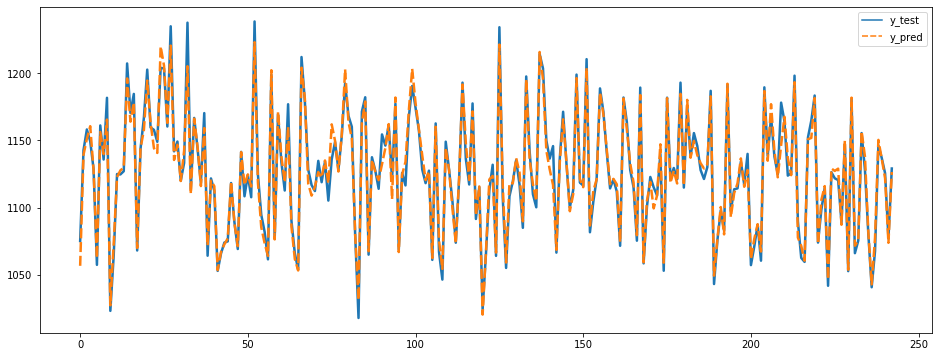

In [15]:
# Pred vs True Visualization
plt.figure(figsize = (16,6))
sns.lineplot(data = test, linewidth = 2.5)
plt.show()

In [16]:
# Date for 2020
date_list = pd.date_range('2019-01-02','2020-01-15', freq='B')
date_list = list(date_list.strftime('%Y-%m-%d'))

# Virtual Data Setting
data = pd.read_csv('./data/DAILY_DATA.csv')
data = data[['date', 'USD']].set_index('date')
data = data[2167:2227]

# Virtual Prediction
for step in date_list :
    
    # Prediction
    virtual_X = sc_X.transform(np.array(data[-60:].T))
    pred = sc_y.inverse_transform(lgb.predict(virtual_X).reshape(-1,1)).reshape(-1)[0]
    pred_df = pd.DataFrame({'USD' : pred}, index=[step])

    # Data Append
    data = data.append(pred_df)

In [17]:
# Virtual 2019 ~ 2020 Data
data = data[60:]
usd_pred = data
usd_pred.columns = ['USD_PRED']

# Real 2019 ~ 2020 Data
data = pd.read_csv('./data/DAILY_DATA.csv')
data = data[['date', 'USD']].set_index('date')
data = data[2227:-1]
usd_true = data
usd_true.columns = ['USD_TRUE']

# Concat
virtual_data = pd.concat([usd_true, usd_pred], axis=1)

# NaN Omit
virtual_data = virtual_data.dropna()

In [18]:
# Result
virtual_data

,USD_TRUE,USD_PRED
2019-01-02,1118.1,1126.719494
2019-01-03,1119.0,1132.086941
2019-01-04,1127.5,1133.201098
2019-01-07,1125.2,1134.270030
2019-01-08,1118.0,1141.943974
...,...,...
2020-01-09,1174.1,1132.105614
2020-01-10,1160.0,1127.759499
2020-01-13,1161.1,1129.464768
2020-01-14,1155.7,1122.051562


In [19]:
# RMSE
from sklearn.metrics import mean_squared_error
print("rmse : {}" .format(mean_squared_error(virtual_data['USD_TRUE'], virtual_data['USD_PRED'])**0.5))

rmse : 48.45565433429979


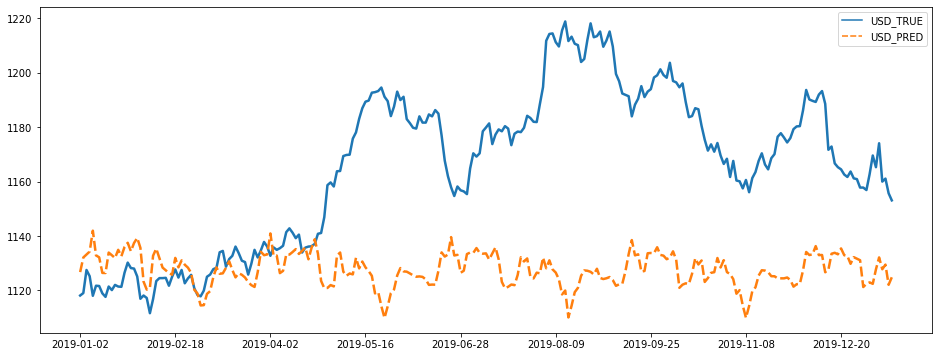

In [20]:
# Pred vs True Visualization
plt.figure(figsize = (16,6))
ax = sns.lineplot(data = virtual_data, linewidth = 2.5)
ax.set(xticks=virtual_data.index[0::30])
plt.show()

### 만약 3개월만 예측을 한다면...?

rmse : 8.646798009782415


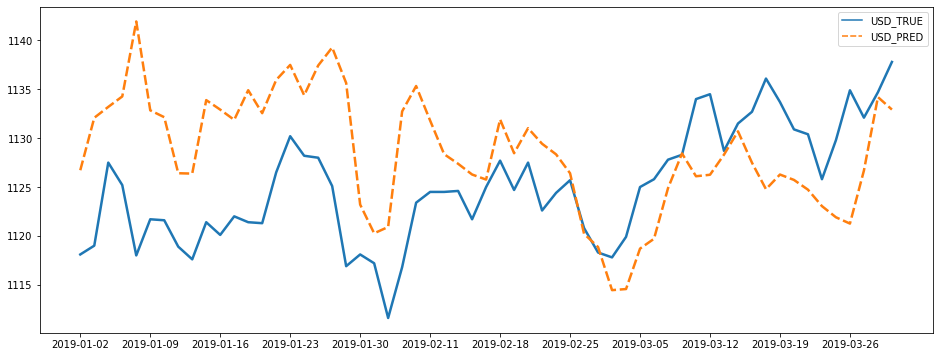

In [21]:
# Result
virtual_data = virtual_data[0:59]

# RMSE
from sklearn.metrics import mean_squared_error
print("rmse : {}" .format(mean_squared_error(virtual_data['USD_TRUE'], virtual_data['USD_PRED'])**0.5))

# Pred vs True Visualization
plt.figure(figsize = (16,6))
ax = sns.lineplot(data = virtual_data, linewidth = 2.5)
ax.set(xticks=virtual_data.index[0::5])
plt.show()